### nlp

[python读取数据的4个常见错误](https://ee.ofweek.com/2019-04/ART-11000-2818-30319818.html)

In [1]:
import warnings
warnings.filterwarnings("ignore") #忽略警告信息
import jieba
import numpy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0,5.0)
#matplotlib.rcParams[‘figure.figsize’] #指定图片像素 
#matplotlib.rcParams[‘savefig.dpi’] #指定分辨率 
#plt.savefig(‘plot123_2.png’, dpi=200) #指定分辨率
from wordcloud import WordCloud

### 导入娱乐新闻数据 分词

In [2]:
df = pd.read_csv("./data/entertainment_news.csv",encoding="utf-8")
df = df.dropna()
df.head(1)

,Unnamed: 0,content
0,0,2016年是综艺井喷的一年，《2016年中国网络视听发展研究报告》数据显示，截至2016...


In [3]:
content = df.content.values.tolist()
segments = []
for line in content:
    try:
        segs = jieba.lcut(line) #jieba.lcut: 直接返回list形式
        for seg in segs:
            if len(seg)>1 and seg!='\r\n':
                segments.append(seg)
    except:
        print(line)
        continue

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/0d/j7b0cl_s2qx7rt2p7_vp4sfr0000gp/T/jieba.cache
Loading model cost 0.784 seconds.
Prefix dict has been built succesfully.


### 去除停用词

In [4]:
words_df = pd.DataFrame({'segments':segments})
words_df.head(10)

,segments
0,2016
1,综艺
2,井喷
3,一年
4,2016
5,中国
6,网络
7,视听
8,发展
9,研究


In [5]:
stop_words = pd.read_csv("./data/stopwords.txt",index_col=False,quoting=3,sep='\t',
                        names = ['stopword'],encoding='utf-8') #quoting=3:全部引用
stop_words.head(2)

,stopword
0,!
1,""""


In [6]:
words_df = words_df[~words_df.segments.isin(stop_words.stopword)]

### 统计词频

In [7]:
words_stats = words_df.groupby('segments')['segments'].agg({'计数':numpy.size}).reset_index()
words_stats = words_stats.sort_values(by=['计数'],ascending=False)
words_stats.head()

,segments,计数
60811,电影,10230
73265,观众,5574
8615,中国,5476
70481,节目,4398
33623,导演,4197


### 做词云

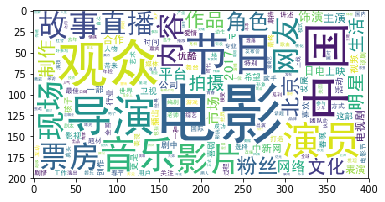

In [8]:
word_cloud = WordCloud(font_path = 'data/simhei.ttf', #指定字体
          max_font_size=80,  #最大字号
          background_color='white') #背景颜色

word_freq = {x[0]:x[1] for x in words_stats.head(1000).values}
w_c = word_cloud.fit_words(word_freq)
plt.imshow(w_c)

### 自定义背景图做词云

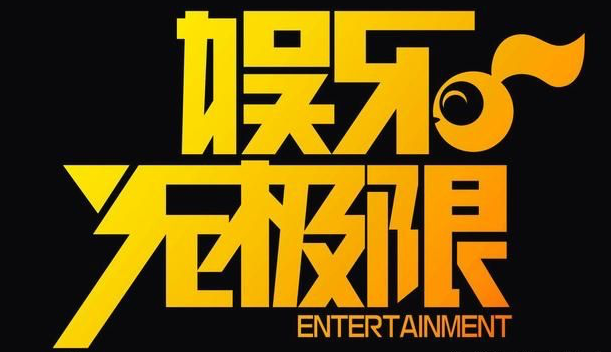

In [9]:
from scipy.misc import imread
from wordcloud import WordCloud,ImageColorGenerator
img = imread('image/entertainment.png')

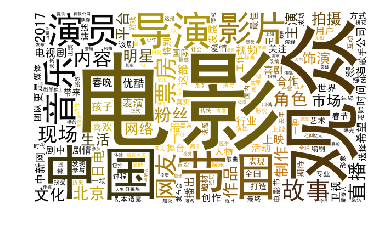

In [10]:
word_cloud = WordCloud(font_path='data/simhei.ttf',background_color='white',
          max_font_size=200,
          mask=img) #指定词云的形状，默认为长方形

words_freq = {x[0]:x[1] for x in words_stats.head(1000).values}
w_c = word_cloud.fit_words(words_freq)

img_color = ImageColorGenerator(img) #读入图形颜色
plt.axis('off')
plt.imshow(w_c.recolor(color_func=img_color))

### 中文NLP

#### TF-IDF
jieba.analyse.extract_tags(sentence,topK=20,withWeight=False,allowPOS=())

    sentence:待提取的文本
    topK:返回几个TF/IDF最大的关键词，默认值为20
    withWeight:是否一并返回关键词权重值
    allowPOS:仅包括指定词汇的词，默认为空，即不筛选

In [11]:
import jieba.analyse as analyse
import pandas as pd

In [12]:
df = pd.read_csv('./data/technology_news.csv',encoding='utf-8')
df = df.dropna()
df.head(1)

,Unnamed: 0,content
0,0,",中新网,1月7日电 恰逢CES 2017拉开大幕，却惊闻“AlphaGo升级版”的M..."


In [13]:
lines = df.content.values.tolist()
lines[:3]

['\u3000\u3000,中新网,1月7日电\xa0 恰逢CES 2017拉开大幕，却惊闻“AlphaGo升级版”的Master迎来60连胜，人类顶尖围棋手在一周内纷纷败给这个谷歌旗下DeepMind团队打造的“围棋大脑”，显然也为聚焦于人工智能的本届CES增添了声势。而首次参展，并致力于打造“原创AI大脑”的中国深度学习领军企业的商汤科技，在人工智能的浪潮之巅，及众多业界前辈和巨匠面前，将会交出一份怎样的答卷呢？',
 '\u3000\u3000徐立，商汤科技CEO在谈起本次参展时谈到：“作为一个成立刚刚两年的创业公司，这次参展，一方面是展示我们最新的人工智能技术和产品，但另一方面，其实是向外表达，我们对于人工智能的理解。人工智能在特定领域中超越人类，是其广泛应用的标志。这与Master的胜利，为围棋世界开拓的新局面不谋而合。”',
 '\u3000\u3000正如最后挑战Master的古力在落败后发表的观点：“人类与人工智能共同探索围棋世界的大幕即将拉开，新一次的围棋革命正在进行着”。商汤科技的展台，尽管只有两块屏幕，但却带来对人工智能带来的变革的最好诠释：一面是可以通过深度学习，在千万级目标库中，300ms内即可获得比对结果的人脸识别“黑科技”；另一面，是国产前十智能手机都在运用的手机“电眼神器”。']

In [14]:
' '.join(lines[:3])

'\u3000\u3000,中新网,1月7日电\xa0 恰逢CES 2017拉开大幕，却惊闻“AlphaGo升级版”的Master迎来60连胜，人类顶尖围棋手在一周内纷纷败给这个谷歌旗下DeepMind团队打造的“围棋大脑”，显然也为聚焦于人工智能的本届CES增添了声势。而首次参展，并致力于打造“原创AI大脑”的中国深度学习领军企业的商汤科技，在人工智能的浪潮之巅，及众多业界前辈和巨匠面前，将会交出一份怎样的答卷呢？ \u3000\u3000徐立，商汤科技CEO在谈起本次参展时谈到：“作为一个成立刚刚两年的创业公司，这次参展，一方面是展示我们最新的人工智能技术和产品，但另一方面，其实是向外表达，我们对于人工智能的理解。人工智能在特定领域中超越人类，是其广泛应用的标志。这与Master的胜利，为围棋世界开拓的新局面不谋而合。” \u3000\u3000正如最后挑战Master的古力在落败后发表的观点：“人类与人工智能共同探索围棋世界的大幕即将拉开，新一次的围棋革命正在进行着”。商汤科技的展台，尽管只有两块屏幕，但却带来对人工智能带来的变革的最好诠释：一面是可以通过深度学习，在千万级目标库中，300ms内即可获得比对结果的人脸识别“黑科技”；另一面，是国产前十智能手机都在运用的手机“电眼神器”。'

In [15]:
content = "".join(lines)
print(analyse.extract_tags(content,topK=30,withWeight=False,allowPOS=()))

['用户', '2016', '互联网', '手机', '平台', '人工智能', '百度', '2017', '智能', '技术', '数据', '360', '服务', '直播', '产品', '企业', '安全', '视频', '移动', '应用', '网络', '行业', '游戏', '机器人', '电商', '内容', '中国', '领域', '通过', '发展']


In [16]:
' '.join(analyse.extract_tags(content,topK=30,withWeight=False,allowPOS=()))

'用户 2016 互联网 手机 平台 人工智能 百度 2017 智能 技术 数据 360 服务 直播 产品 企业 安全 视频 移动 应用 网络 行业 游戏 机器人 电商 内容 中国 领域 通过 发展'

### textRank算法

jieba.analyse.textrank(sentence,topK=20,withWeight=False,allowPOS=('ns','n','vn','v')):默认过滤词性

jieba.analyse.TextRank():新建自定义实例

基本思想：

    1) 将待抽取关键词的文本进行分词；
    2) 以固定窗口大小(默认为5，根据span属性调整大小)，通过词与词之间的共现关系，构建图
    3) 计算图中节点的PageRank，注意是无向带权图

In [17]:
print(' '.join(analyse.textrank(content,withWeight=False,allowPOS=('ns','n','vn','v'))))
#n:名词；ns:地名； v:动词； vn:动名词

用户 技术 中国 手机 平台 数据 企业 互联网 服务 产品 发展 市场 智能 行业 公司 进行 成为 提供 内容 百度


## 用机器学习方法完成文本分类

#### 朴素贝叶斯
科技 汽车 娱乐 军事 体育

##### 准备数据

In [18]:
import jieba
import pandas as pd
df_technology = pd.read_csv('./data/technology_news.csv',encoding='utf-8')
df_technology = df_technology.dropna()

df_car= pd.read_csv('./data/car_news.csv',encoding='utf-8')
df_car = df_car.dropna()

df_entertainment = pd.read_csv('./data/entertainment_news.csv',encoding='utf-8')
df_entertainment = df_entertainment.dropna()

df_military = pd.read_csv('./data/military_news.csv',encoding='utf-8')
df_military = df_military.dropna()

df_sports = pd.read_csv('./data/sports_news.csv',encoding='utf-8')
df_sports = df_sports.dropna()

technology = df_technology.content.values.tolist()[1000:21000]
car = df_car.content.values.tolist()[1000:21000]
entertainment = df_entertainment.content.values.tolist()[:20000]
military = df_military.content.values.tolist()[:20000]
sports = df_sports.content.values.tolist()[:20000]

In [19]:
technology[12]

'\u3000\u3000现在家里都拉了网线，都能无线上网，一定要帮他们先登上WiFi，另外，老人不懂得流量是什么，也不知道如何开关，控制流量，所以设置好流量上限很重要，免得不小心点开了视频或者下载，电话费就大发了。'

In [20]:
car[15]

'\xa0\xa0\xa0\xa0广州日报讯 （记者张丹羊 通讯员交宣）记者昨日从市公安局交警支队获悉，今日广州市非中小客车登记预约系统正式上线，车主可预约2月4日（含）起10个工作日内的非中小客车注册、转移、变更登记业务和补领机动车登记证业务，可以通过网上车管所、客服电话进行登记预约。'

In [21]:
entertainment[8]

'\u3000\u3000为了在形式相近而体量巨大的同类节目中获得关注，主持人和嘉宾们开始以打擦边球的争议话题、以低俗化的语言博眼球。如《恶毒梁欢秀》骂周杰伦是垃圾，综艺大咖薛之谦参与节目频频爆出具有深意的“污”语言，甚至一向以正能量令人尊重的传统节目主持人何炅也开始以“何首污”的名号放飞自我。'

In [22]:
military[0]

'\u3000\u3000新华社北京1月8日电(记者董瑞丰)军民融合发展已经上升为国家战略，但现阶段国防工业企业军民融合深度发展仍面临一系列问题。中国国防工业企业协会会长刘东奎8日表示，将建立军转民与民参军、技术创新与成果转化、产业促进、金融服务和国际合作五大服务平台，促进军民资源双向转移、良性互动。'

In [23]:
sports[:2]

['\u3000\u3000,中新网,深圳1月2日电（记者 郑小红）2017年深圳网球公开赛单打正赛1日在深圳市龙岗区体育中心正式开打。7号种子尼库莱斯库携手本土人气球员王蔷取得开门红，晋级女单次轮。',
 '\u3000\u30001日的首场比赛中，世界排名38位的尼库莱斯库面临了来自中国球员张恺琳的巨大挑战。开局不利的她最终耗时两小时四十分钟才艰难以5-7，6-1，6-3战胜中国外卡选手张恺琳。']

##### 停用词

In [24]:
stopwords=pd.read_csv('./data/stopwords.txt',index_col=False,quoting=3,sep='\t',
                      names=['stopword'],encoding='utf-8')
#当文本文件中带有英文双引号时，直接用pd.read_csv进行读取会导致行数减少，此时应该对read_csv设置参数quoting=3或者quoting=csv.QUOTE_NONE”
#控制csv中的引号常量。可选 QUOTE_MINIMAL (0), QUOTE_ALL (1), QUOTE_NONNUMERIC (2) or QUOTE_NONE (3)

stopwords = stopwords['stopword'].values

In [25]:
stopwords

array(['!', '"', '#', ..., '07', '08', '09'], dtype=object)

##### 去除停用词

In [26]:
def preprocess_text(content,sencences,category):
    for line in content:
        try:
            segs = jieba.lcut(line)
            segs = filter(lambda x:len(x)>1,segs)
            segs = filter(lambda x:x not in stopwords,segs)
            sencences.append((" ".join(segs),category))
        except:
            print(line)
            continue

In [29]:
sencences = []
preprocess_text(technology,sencences,'technology')
preprocess_text(car,sencences,'car')
preprocess_text(entertainment,sencences,'entertainment')
preprocess_text(military,sencences,'military')
preprocess_text(sports,sencences,'sports')

In [31]:
sencences[:2]

[('去年 周星驰 徐克 西游 伏妖 电影 刚刚 公布 上线 日期 完美 世界 众多 版权 争夺 方中 脱颖而出 拿下 西游 伏妖 电影 独家 手游 开发 版权 计划 同名 手游 电影 同期 发布 西游 伏妖 电影 版权 正版 授权 完美 世界 聚力 互娱 联合 发行 手游 西游 伏妖 正式 iOS 开放 公测 该作 上架 苹果 商店 苹果 商店 已有 数款 西游 伏妖 近似 字样 为名 授权 游戏 产品 横行 肆意',
  'technology'),
 ('App Store 发现 苹果 商店 上架 几款 名称 带有 西游 伏妖 字样 产品 公开 授权 声明 明知 授权 情况 擅自 西游 伏妖 近似 字样 游戏 名称 公众 传播 试图 搭便车 形式 热度',
  'technology')]

##### 打乱顺序 生成训练机集

In [32]:
import random
random.shuffle(sencences)

In [33]:
sencences[:2]

[('特效', 'entertainment'),
 ('当日 小将 浩然 运动员 代表 上台 发言 2013 夺得 全运会 十米 气步枪 冠军 浩然 项目 上将 亚运会 世锦赛 世界杯 总决赛 冠军 云集 一身',
  'sports')]

把原数据分成测试集和训练集

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
x,y = zip(*sencences) #zip()：压缩 zip(*X):解压
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1234)

In [41]:
import numpy as np
print(np.shape(x_train),np.shape(x_test),np.shape(x))
# 75% 25%

(65696,) (21899,) (87595,)


In [42]:
len(x_train)

65696

下一步要做的就是在降噪数据上抽取出来有用的特征啦，我们对文本抽取词袋模型特征

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(analyzer='word',max_features=4000)

vec.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=4000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [48]:
print(vec.transform(x_train))

  (0, 280)	1
  (0, 457)	1
  (0, 492)	1
  (0, 921)	1
  (0, 1060)	1
  (0, 1263)	1
  (0, 1545)	1
  (0, 1885)	1
  (0, 1967)	1
  (0, 2343)	1
  (0, 2506)	1
  (0, 2783)	1
  (0, 2799)	1
  (0, 2900)	1
  (0, 2904)	1
  (0, 2905)	1
  (0, 2923)	1
  (0, 3058)	1
  (0, 3065)	1
  (0, 3491)	1
  (1, 148)	2
  (1, 149)	1
  (1, 257)	1
  (1, 466)	1
  (1, 1020)	1
  :	:
  (65691, 3180)	1
  (65691, 3244)	1
  (65691, 3263)	1
  (65691, 3264)	1
  (65691, 3269)	1
  (65691, 3312)	4
  (65691, 3334)	1
  (65691, 3418)	2
  (65691, 3460)	1
  (65691, 3644)	1
  (65692, 283)	1
  (65692, 329)	1
  (65692, 789)	1
  (65692, 1961)	1
  (65692, 2337)	2
  (65692, 2434)	1
  (65692, 2769)	1
  (65693, 2636)	1
  (65693, 3716)	1
  (65694, 2902)	1
  (65695, 1019)	1
  (65695, 1509)	1
  (65695, 2337)	1
  (65695, 2560)	1
  (65695, 3173)	1


把分类器import进来并且训练

In [49]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(vec.transform(x_train),y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

准确率

In [51]:
classifier.score(vec.transform(x_test),y_test)

0.8420019178957944

In [53]:
len(x_test)

21899

有没有办法把准确率提高一些呢？

我们可以把特征做得更棒一点，比如说，我们试试加入抽取2-gram和3-gram的统计特征，比如可以把词库的量放大一点。

    ngram_range(min,max)是指将text分成min，min+1，min+2,.........max 个不同的词组比如'Python is useful'中ngram_range(1,3)之后可得到'Python'  'is'  'useful'  'Python is'  'is useful' 和'Python is useful'如果是ngram_range (1,1) 则只能得到单个单词'Python'  'is'和'useful'

In [ ]:
from sklearn.feature_extract import CountVetorizer
vec = CountVetorizer(analyzer='word',
                    ngram_range=(1,4),
                    max_features=4000)

In [56]:
classifier = MultinomialNB()
classifier.fit(vec.transform(x_test),y_test)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [57]:
classifier.score(vec.transform(x_test),y_test)

0.8541942554454541

#### 交叉验证
最好的验证方式是交叉验证，但是交叉验证最好保证每一份里面的样本类别是相对均衡的，这里我们用stratifiedKFold

In [71]:
from sklearn.cross_validation import StratifiedKFold
import numpy as np


stratified_kfold = StratifiedKFold(np.array(y),n_folds=5,shuffle=True)
for i,j in  stratified_kfold:
    print(i,j)
    print(type(i))

[    1     2     3 ... 87592 87593 87594] [    0     4    22 ... 87586 87588 87589]
<class 'numpy.ndarray'>
[    0     1     3 ... 87591 87593 87594] [    2     8    14 ... 87583 87587 87592]
<class 'numpy.ndarray'>
[    0     2     3 ... 87592 87593 87594] [    1     6     9 ... 87573 87577 87584]
<class 'numpy.ndarray'>
[    0     1     2 ... 87592 87593 87594] [    3     5    10 ... 87581 87590 87591]
<class 'numpy.ndarray'>
[    0     1     2 ... 87590 87591 87592] [    7    12    15 ... 87585 87593 87594]
<class 'numpy.ndarray'>


In [ ]:
from sklearn.cross_validation import stratifiedKFold
from sklearn.metrics import accuracy_score,precision_score
import numpy as np

def stratified_cv(x,y,clf_class,shuffle=True,n_folds=5,**kwargs):
    #**kwargs：（表示的就是形参中按照关键字传值把多余的传值以字典的方式呈现）
    ##交叉验证函数：X是特征数据，y是label，clf_class是你选择的分类器(如SVM KNN)，kwargs指定的参数
    stratified_kfold = stratifiedKFold(y,n_folds=nfolds,shuffle=shuffle)
    y_pred = y[:]
    for train_index,test_index in stratified_kfold:
        x_train,x_test = x[train_index],x[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(x_train,y_train)
        y_pred[test_index] = clf.predict(x_test)
    return y_pred

In [ ]:
NB = MultinomialNB
print(precision_score(y,stratified_cv(vec.transform(x),np.array(y),'macro')))

In [76]:
y_pred = np.array(y)
y_pred[0]='sport'
y_pred

array(['sport', 'sports', 'sports', ..., 'car', 'sports', 'technology'],
      dtype='<U13')